In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os
import time

In [2]:
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Machine Learning in Python\Achievement 2\Project Data'

In [3]:
df_weather = pd.read_csv(os.path.join(path, 'DATASET_weather_clean_1-10.csv'))
df_answers = pd.read_csv(os.path.join(path, 'DATASET_predictions.csv'))

# Drop unnecessary columns
df_answers = df_answers.drop(columns=['DATE'])

In [4]:
# Convert to numpy arrays
X = np.array(df_weather)
y = np.array(df_answers)

In [5]:
# Transform y using argmax (for multiclass output)
y = np.argmax(y, axis=1)

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Reshape for Random Forest (flattening 3D data)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [8]:
# Define Random Forest model
clf = RandomForestClassifier(random_state=42)

In [9]:
# Define hyperparameter space
param_space = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [10]:
# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_space,
    n_iter=20,  # Fewer iterations for testing
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [29]:
# Fit the model on all stations
time_start = time.time()
random_search.fit(X_train_flat, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print("Time Taken:", time.time() - time_start)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Best Score: 0.9342047930283224
Time Taken: 1192.8645169734955


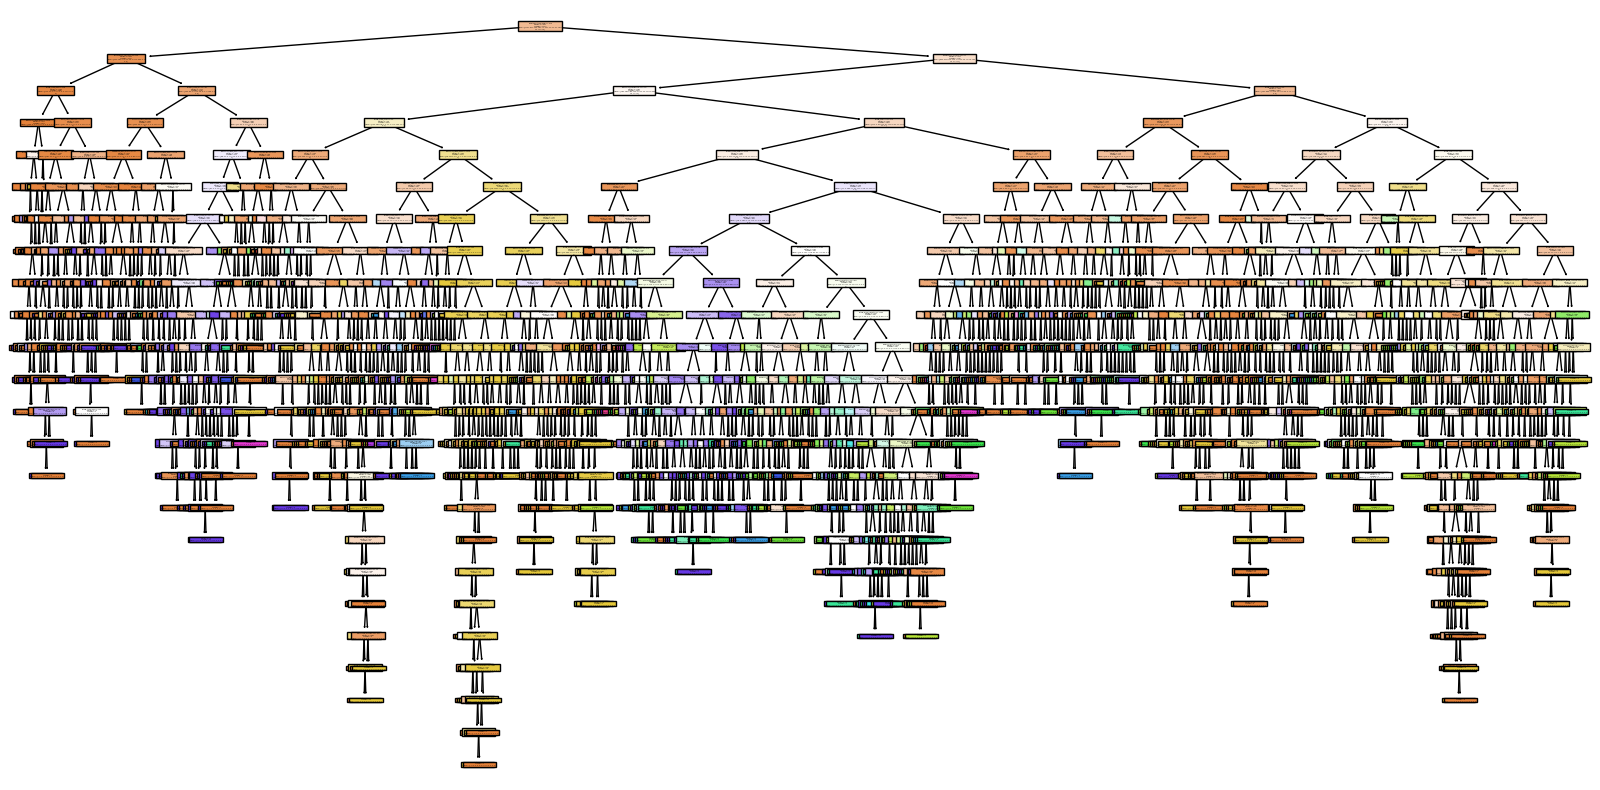

In [30]:
# Save one tree visualization
best_rf = random_search.best_estimator_
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=df_weather.columns, filled=True)
plt.savefig("all_stations_tree.png")
plt.show()

In [33]:
# Subset data for one station (MAASTRICHT)
X_MAASTRICHT = df_weather.filter(like='MAASTRICHT_').values

In [35]:
# Split MAASTRICHT data
X_train_MAASTRICHT, X_test_MAASTRICHT, y_train_MAASTRICHT, y_test_MAASTRICHT = train_test_split(X_MAASTRICHT, y, test_size=0.2, random_state=42)

In [37]:
# Run RandomizedSearchCV on MAASTRICHT data
X_train_flat_MAASTRICHT = X_train_MAASTRICHT.reshape(X_train_MAASTRICHT.shape[0], -1)
X_test_flat_MAASTRICHT = X_test_MAASTRICHT.reshape(X_test_MAASTRICHT.shape[0], -1)

time_start_MAASTRICHT = time.time()
random_search.fit(X_train_flat_MAASTRICHT, y_train_MAASTRICHT)
print("Best Parameters for Maastricht:", random_search.best_params_)
print("Best Score for Maastricht:", random_search.best_score_)
print("Time Taken for Maastricht:", time.time() - time_start_MAASTRICHT)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Maastricht: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}
Best Score for Maastricht: 0.691884531590414
Time Taken for Maastricht: 375.34412145614624


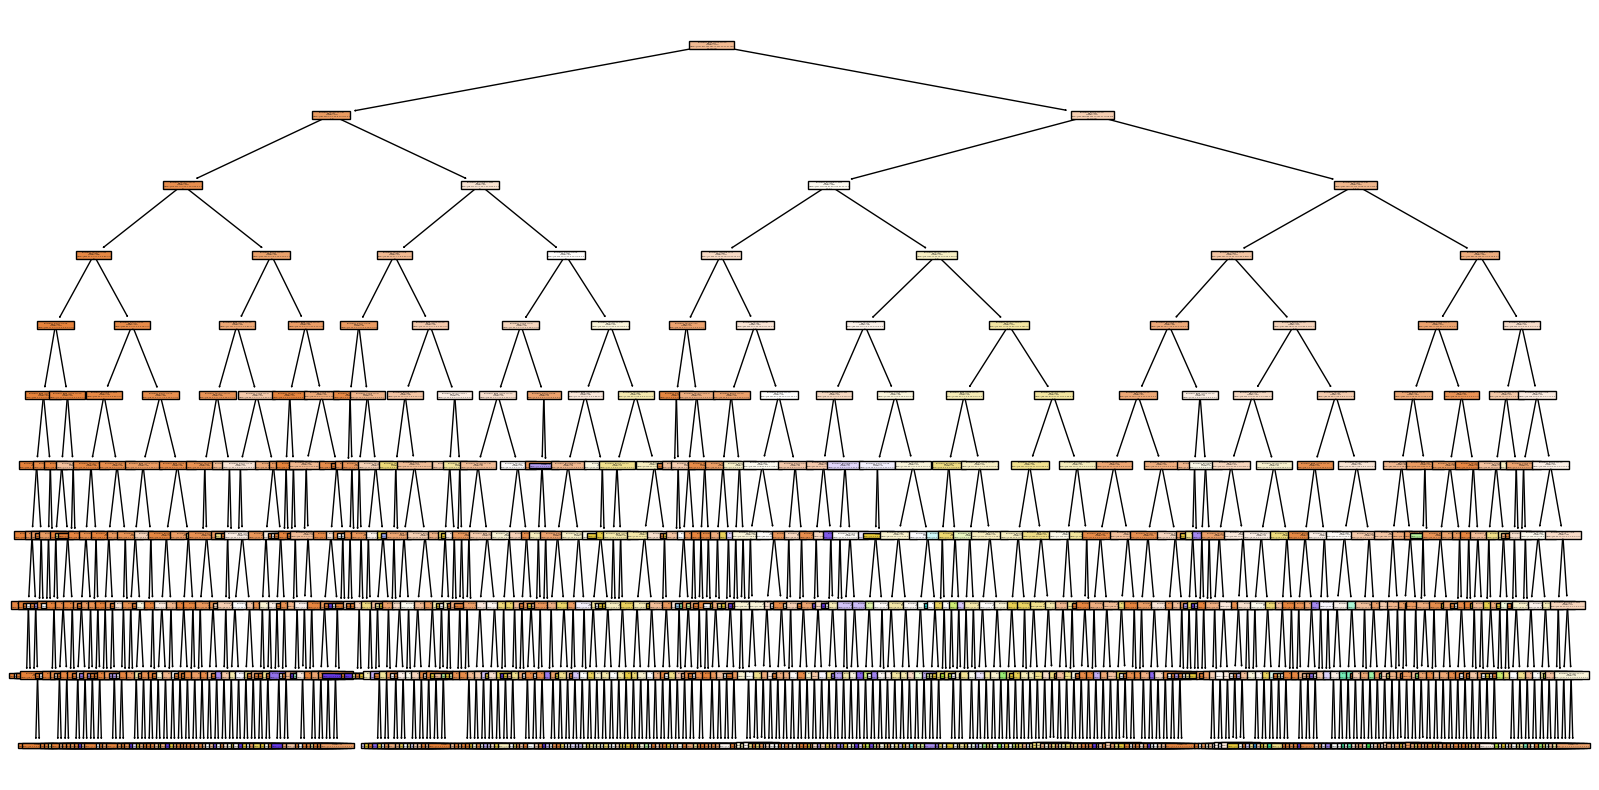

In [38]:
# Save one tree visualization for MAASTRICHT
best_rf_MAASTRICHT = random_search.best_estimator_
plt.figure(figsize=(20, 10))
plot_tree(best_rf_MAASTRICHT.estimators_[0], feature_names=df_weather.filter(like='MAASTRICHT_').columns, filled=True)
plt.savefig("MAASTRICHT_tree.png")
plt.show()

In [39]:
# Feature importance comparison
importance_all = pd.DataFrame(
    {
        "Feature": df_weather.columns,
        "Importance": best_rf.feature_importances_
    }
).sort_values(by="Importance", ascending=False)

importance_MAASTRICHT = pd.DataFrame(
    {
        "Feature": df_weather.filter(like='MAASTRICHT_').columns,
        "Importance": best_rf_MAASTRICHT.feature_importances_
    }
).sort_values(by="Importance", ascending=False)

print("Feature Importances for All Stations:")
print(importance_all.head(10))

print("Feature Importances for Maastricht:")
print(importance_MAASTRICHT.head(10))

Feature Importances for All Stations:
                   Feature  Importance
4      BASEL_precipitation    0.083816
13  BELGRADE_precipitation    0.070000
89         MADRID_temp_max    0.049328
17       BELGRADE_temp_max    0.042087
8           BASEL_temp_max    0.025546
87        MADRID_temp_mean    0.025462
15      BELGRADE_temp_mean    0.023670
26       BUDAPEST_temp_max    0.023643
24      BUDAPEST_temp_mean    0.020790
22  BUDAPEST_precipitation    0.020723
Feature Importances for Maastricht:
                       Feature  Importance
8          MAASTRICHT_temp_max    0.190975
2          MAASTRICHT_pressure    0.152411
3  MAASTRICHT_global_radiation    0.148592
6         MAASTRICHT_temp_mean    0.147986
7          MAASTRICHT_temp_min    0.116056
4     MAASTRICHT_precipitation    0.091423
5          MAASTRICHT_sunshine    0.060990
1          MAASTRICHT_humidity    0.051972
0       MAASTRICHT_cloud_cover    0.039595


In [ ]:
# Save feature importance results
importance_all.to_csv("feature_importance_ALL_stations.csv", index=False)
importance_MAASTRICHT.to_csv("feature_importance_MAASTRICHT.csv", index=False)